In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
committer_involvement = pd.read_csv("../dataset/committer_involvement.csv", names=["issue_id", "project_name", "user_id", "Start Issue", "Six Months Prior", "Commit Amount Half Year", "Total Commits"]).convert_dtypes()
comments = pd.read_csv("../dataset/comments.csv").convert_dtypes()
comments = comments.drop(columns='Unnamed: 0')
tbdf = pd.read_csv("../dataset/annotated_comment_level.csv").convert_dtypes()
tbdf = tbdf.drop(columns='id')
tbdf.head()
# comments.head()

,issue_id,comment_id,tbdf,comment_body
0,6209234,6209234,<NA>,I noticed that Prepared Statements seem to be ...
1,6209234,7718792,Entitlement,"Yes, prepared statements are on my todo list. ..."
2,6209234,7722530,<NA>,The only downside with the SQL-based approach ...
3,6209234,7722736,<NA>,Prepared statements use a range of additional ...
4,6209234,7744377,Impatience,How does https://github.com/sidorares/nodejs-m...


In [3]:
comment_committer = pd.merge(comments, committer_involvement, how='outer', on=["project_name", "issue_id", "user_id"])
comment_committer.head(10)

,project_name,issue_id,comment_id,comment_body,created_at,user_id,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
0,rails/rails,352750519,352750519,Per https://twitter.com/dhh/status/10320503255...,2018-08-21T23:48:12Z,2741,2018-08-21,2017-12-21,41,4268
1,rails/rails,352750519,414873738,"Regardless of origin, allow/deny are simply cl...",2018-08-22T01:15:48Z,2741,2018-08-21,2017-12-21,41,4268
2,rails/rails,352750519,414870475,"Good intentions, but I doubt there's any relat...",2018-08-22T00:57:07Z,14361073,2018-08-21,2017-12-21,0,0
3,rails/rails,352750519,414873068,At least [one source from a search](https://ww...,2018-08-22T01:11:49Z,10137,2018-08-21,2017-12-21,0,0
4,rails/rails,352750519,414875618,1. [etymology is quite important]( https://ww...,2018-08-22T01:26:22Z,201135,2018-08-21,2017-12-21,0,0
5,rails/rails,352750519,414877006,The terms **Blocklist** and **Clearlist** are ...,2018-08-22T01:33:59Z,905505,2018-08-21,2017-12-21,0,0
6,rails/rails,352750519,414886139,I'm gonna go ahead and get started on this... 😄,2018-08-22T02:23:21Z,19339870,2018-08-21,2017-12-21,0,0
7,rails/rails,352750519,414893315,"One could also argue that in color theory, bla...",2018-08-22T03:03:42Z,396486,2018-08-21,2017-12-21,0,0
8,rails/rails,352750519,415013013,@bitmonk I respectfully disagree with your opi...,2018-08-22T12:21:31Z,396486,2018-08-21,2017-12-21,0,0
9,rails/rails,352750519,414893935,"I think this is a great idea, I have proposed ...",2018-08-22T03:07:33Z,526479,2018-08-21,2017-12-21,0,0


In [4]:
all_info = pd.merge(comment_committer, tbdf, how='outer', on=["issue_id", "comment_id", "comment_body"])
all_info = all_info.set_index(['user_id','project_name']).sort_index()
all_info.drop_duplicates(subset="comment_id", inplace=True)
# all_info = all_info.dropna()
all_info

issue_id  comment_id   
user_id project_name                                 
7       rack/rack            318673916   385825312  \
        <NA>                 318673916        <NA>   
285     phusion/passenger    362259981   509013763   
378     tpope/vim-fugitive   549848681   574482902   
        tpope/vim-fugitive   549848681   574509430   
...                                ...         ...   
<NA>    <NA>                2044991737  2044991737   
        <NA>                2044991734  2044991734   
        <NA>                2040759060  2040759060   
        <NA>                2044991710  2044991710   
        <NA>                2044991706  2044991706   

                                                                 comment_body   
user_id project_name                                                            
7       rack/rack           Hi all! Websockets and rack again, let's do th...  \
        <NA>                                                             <NA>   
285     phusion/passenger   Still broken on a fresh ubuntu install. Very d...   
378     tpope/vim-fugitive  Where is the symlink, where is it pointing, an...   
        tpope/vim-fugitive  You said the symlink was a directory. I ask wh...   
...                                                                       ...   
<NA>    <NA>                ## 🐞 Issue
YouTube turn on captions (chosen b...   
        <NA>                ### Type
Cosmetic
### Bug description
wide ...   
        <NA>                ### Application
Youtube ReVanced
### Issue
...   
        <NA>                ### Type
Other
### Bug description
hide cre...   
        <NA>                ### Type
Error at runtime
### Bug descriptio...   

                                      created_at Start Issue Six Months Prior   
user_id project_name                                                            
7       rack/rack           2018-05-02T00:01:11Z        <NA>             <NA>  \
        <NA>                                <NA>  2018-04-28       2017-08-28   
285     phusion/passenger   2019-07-07T16:37:39Z  2018-09-20       2018-01-20   
378     tpope/vim-fugitive  2020-01-15T03:46:50Z  2020-01-14       2019-05-14   
        tpope/vim-fugitive  2020-01-15T06:00:37Z  2020-01-14       2019-05-14   
...                                          ...         ...              ...   
<NA>    <NA>                                <NA>        <NA>             <NA>   
        <NA>                                <NA>        <NA>             <NA>   
        <NA>                                <NA>        <NA>             <NA>   
        <NA>                                <NA>        <NA>             <NA>   
        <NA>                                <NA>        <NA>             <NA>   

                            Commit Amount Half Year  Total Commits   
user_id project_name                                                 
7       rack/rack                              <NA>           <NA>  \
        <NA>                                      0              0   
285     phusion/passenger                         0              0   
378     tpope/vim-fugitive                      395           1265   
        tpope/vim-fugitive                      395           1265   
...                                             ...            ...   
<NA>    <NA>                                   <NA>           <NA>   
        <NA>                                   <NA>           <NA>   
        <NA>                                   <NA>           <NA>   
        <NA>                                   <NA>           <NA>   
        <NA>                                   <NA>           <NA>   

                                          tbdf  
user_id project_name                            
7       rack/rack                         <NA>  
        <NA>                              <NA>  
285     phusion/passenger   Bitter frustration  
378     tpope/vim-fugitive                <NA>  
        tpope/vim-fugitive

In [8]:
full_df = pd.merge(tbdf, comment_committer, how='left', on=["comment_id", "issue_id", "comment_body"])
full_df = full_df.set_index(['comment_id']).sort_index()
# full_df = full_df.dropna()
full_df

,issue_id,tbdf,comment_body,project_name,created_at,user_id,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
comment_id,,,,,,,,,,
6209234,6209234,<NA>,I noticed that Prepared Statements seem to be ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7718792,6209234,Entitlement,"Yes, prepared statements are on my todo list. ...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7722530,6209234,<NA>,The only downside with the SQL-based approach ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7722736,6209234,<NA>,Prepared statements use a range of additional ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7744377,6209234,Impatience,How does https://github.com/sidorares/nodejs-m...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2044991706,2044991706,<NA>,### Type Error at runtime ### Bug descriptio...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2044991710,2044991710,<NA>,### Type Other ### Bug description hide cre...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2044991734,2044991734,<NA>,### Type Cosmetic ### Bug description wide ...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [15]:
full_zero = full_df[full_df['Commit Amount Half Year'] == 0]
full_commit = full_df[full_df['Commit Amount Half Year'] > 0]

full_zero.info()
full_commit.info()

full_commit

## 1923 comments, 67.6% no commits (not necessarily distinct users)

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 257408022 to 1959812102
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   issue_id                 1305 non-null   Int64 
 1   tbdf                     358 non-null    string
 2   comment_body             1299 non-null   string
 3   project_name             1305 non-null   string
 4   created_at               1305 non-null   string
 5   user_id                  1305 non-null   Int64 
 6   Start Issue              1305 non-null   string
 7   Six Months Prior         1305 non-null   string
 8   Commit Amount Half Year  1305 non-null   Int64 
 9   Total Commits            1305 non-null   Int64 
dtypes: Int64(4), string(6)
memory usage: 118.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 67171304 to 1777796247
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   

,issue_id,tbdf,comment_body,project_name,created_at,user_id,Start Issue,Six Months Prior,Commit Amount Half Year,Total Commits
comment_id,,,,,,,,,,
67171304,67171304,<NA>,<NA>,Automattic/mongoose,2015-04-08T16:44:41Z,1620265,2015-04-08,2014-08-08,558,692
293280076,119063763,<NA>,"@gottesman That's a regression, this dropdown ...",telegramdesktop/tdesktop,2017-04-11T14:25:27Z,17900494,2015-11-26,2015-03-26,583,1005
294483472,119063763,<NA>,@VBelozyorov Now you can just use three column...,telegramdesktop/tdesktop,2017-04-17T13:14:47Z,17900494,2015-11-26,2015-03-26,583,1005
294497513,119063763,<NA>,@VBelozyorov You can click on the emoji icon n...,telegramdesktop/tdesktop,2017-04-17T14:35:45Z,17900494,2015-11-26,2015-03-26,583,1005
294537551,119063763,<NA>,@VBelozyorov I mean click on the emoji icon (n...,telegramdesktop/tdesktop,2017-04-17T17:38:44Z,17900494,2015-11-26,2015-03-26,583,1005
...,...,...,...,...,...,...,...,...,...,...
1672103125,1843328693,Vulgarity,Damn right we don't! And the paragraph you're ...,doctrine/orm,2023-08-09T20:29:17Z,657779,2023-08-09,2022-12-09,3,8
1672907400,1843328693,<NA>,"FTR, duplicate of #10864",doctrine/orm,2023-08-10T09:47:53Z,1506493,2023-08-09,2022-12-09,33,186
1675967347,1107373635,<NA>,#5234 raised the **minimum Neovim version to v...,nvim-treesitter/nvim-treesitter,2023-08-12T15:35:34Z,2361214,2022-01-18,2021-05-18,5,5


Text(0.5, 0, 'Has made commits')

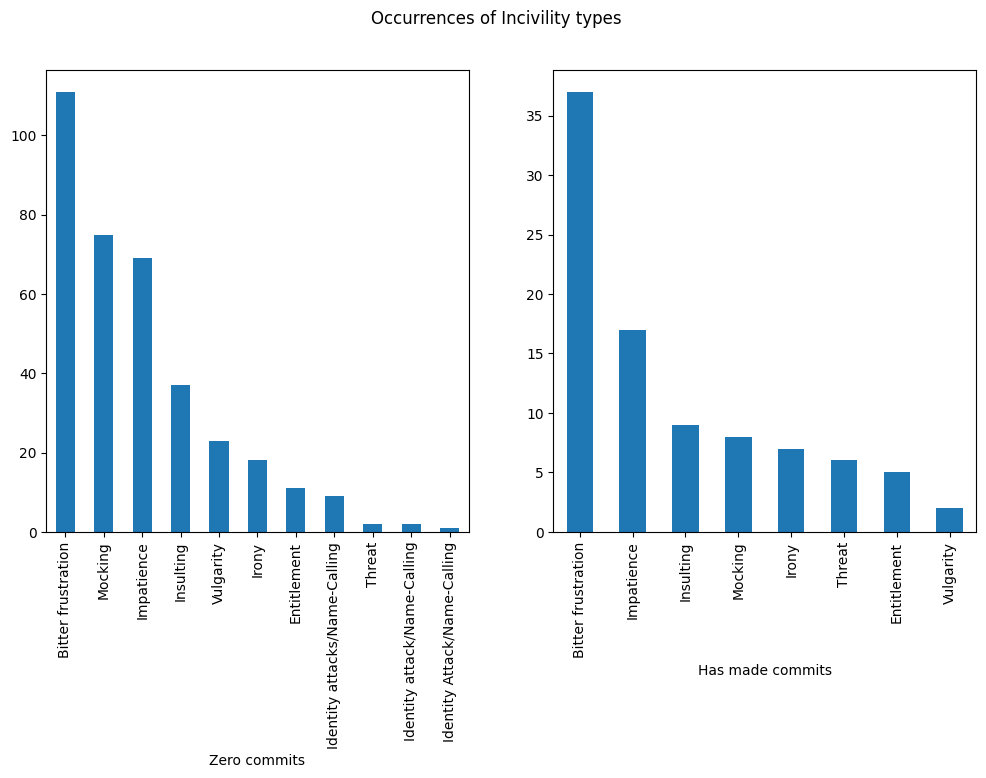

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

fig.suptitle('Occurrences of Incivility types')

full_zero['tbdf'].value_counts(sort=True).plot.bar(ax=axes[0])
full_commit['tbdf'].value_counts(sort=True).plot.bar(ax=axes[1])

axes[0].set_xlabel("Zero commits")
axes[1].set_xlabel("Has made commits")
